In [1]:
import classes as cl
import network
import travel_time as travel
import numpy as np
import plot
import import_ipynb
import heuristic as heu
import main1
import sampling 
import networkx as nx
import sorting
import localsearch as search

importing Jupyter notebook from main1.ipynb
Total Population:  13337


In [2]:
grid, V_stops, V_blocks, V_existing, V_possible, pop, all_facilities, total_pop, travel2 = main1.network_details()

n, m, e, p, p_min, p_max, d_b, d_s = main1.parameters()

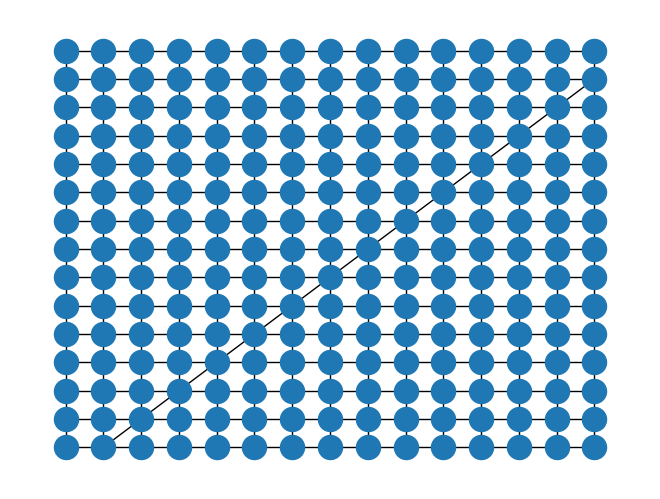

In [3]:
G = sampling.build_graph(grid, V_blocks, V_stops, V_existing, V_possible)
dict = {}
for node in grid.keys():
    dict[node] = node
nx.draw(G, dict)

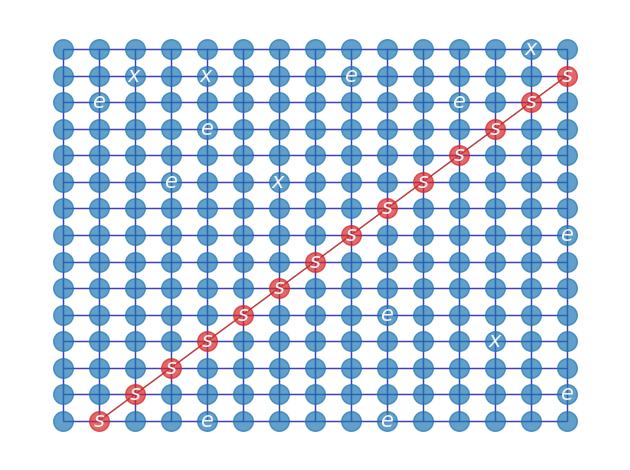

In [4]:
alpha_node = 0.7
alpha_edge = 0.5
node_size = 200
cent = []
plot.plot_graph(G, V_stops, V_possible, V_existing, all_facilities, cent, node_size, alpha_node, alpha_edge)

$Step ?? :$ Choosing Seed Points.

 To choose $p$ district centers from the set of possible locations, we use a version of the $k$-means++ algorithm [David Arthur, Sergei Vassilvitskii, k-means++: The Advantages of Careful Seeding].

The $k$-means++ algorithm aims at spreading out the initial medians as far as possible.

$1a.$ Choose an initial center $c_1$ uniformly at random from $X$.

$1b.$ Choose the next center $c_i$, selecting $c_i = x^{\prime} \in X$ with probability $\dfrac{D(x^{\prime})^2}{\sum\limits_{x \in X} D(x)^2}$.

$1c.$ Repeat Step $1b$ until we have chosen a total of $k$ centers.

Note: We can choose them completely random as in the Ricca's paper.

In [5]:
#p = 5
#epsilon =0.1

#centers = sampling.choose_centers_kmeans2(grid, V_existing, V_possible, p)
#centers1 = sampling.choose_centers_kmeans_3(grid, V_existing, V_possible, p)

    Initialize set of clusters: $C = \{ \}$.  (Dictionary. key: cluster name, value: list of vertices)
    Determine the set of the connected components in $G$, $\mathcal{G}=\{G_1, G_2, ..., G_k\}$. 
    Repeat until $\mathcal{G} = \emptyset$.

        For each component $G_i$, do:

            If there is only one facility in the vertex set:
                Put $G_i$ to $C$ and remove it from $G$.

            else:   
                Choose a random facility $u$ from $G_i$. 
                Calculate lengths of the shortest paths from $u$ to all other facilities. 
                Pick the minimum length. 
                Let $P$ be one of the shortest paths corresponding to the minimum length. 
                Choose an edge from $P$ uniformly at random and remove the edge.
                Update $G$.
        
        Update $\mathcal{G}$.

In [6]:
"""neighborhood = search.exact_neighborhood(G, C)

for neighbor in neighborhood.values():
    print(neighbor)"""

'neighborhood = search.exact_neighborhood(G, C)\n\nfor neighbor in neighborhood.values():\n    print(neighbor)'

    Notes: 

       (1) Each phc location is a part of a block. They should also be a block node with a population.

       (2) Stops might have the same sitution. They currently have zero population now. But they affect
           the access objective function since they are also clustered.
           
       (3) Closed phcs should also be clustered. Otherwise, they make clusters disconnected as in the picture below.
    
    Edit: 

        Assign a population to each nonblock node and add these nodes to the set of blocks. Correct related parts in all the codes.
    
    Note:

        PHCs already have a population! Edit all the code accordingly.

In [7]:
#partitioned_tree, spanning_tree, solution, popul = search.generate_initial_partition(G, grid, centers1)
#origin, boundaries, neighborhood = search.exact_neighborhood(G, solution)
#plot.plot_graph_clusters_boundaries(spanning_tree, V_stops, V_possible, V_existing, all_facilities, centers1, node_size, solution, boundaries, origin)

In [8]:
#plot.plot_graph_clusters_boundaries(partitioned_tree, V_stops, V_possible, V_existing, all_facilities, centers1, node_size, solution, boundaries, origin)

In [9]:
#solution1, populations, partitioned_t, spanning = search.generate_initial_solution1(G, grid, centers1)
#origin1, boundaries1, neighborhood1 = search.exact_neighborhood(G, solution1)
#plot.plot_graph_clusters_boundaries(spanning, V_stops, V_possible, V_existing, all_facilities, centers1, node_size, solution1, boundaries1, origin1)
#plot.plot_graph_clusters_boundaries(partitioned_t, V_stops, V_possible, V_existing, all_facilities, centers1, node_size, solution, boundaries1, origin1)
#plot.plot_graph_clusters(partitioned_t, V_stops, V_possible, V_existing, all_facilities, centers1, node_size, solution, boundaries1, origin1)

In [10]:
#plot.plot_graph_clusters(G, V_stops, V_possible, V_existing, all_facilities, centers1, node_size, solution, boundaries1, origin1)

In [11]:
k = 5

seeds = sampling.random_centers(V_existing, V_possible, k)
partitioned_tree, spanning_tree, solution, popul = search.generate_initial_partition(G, grid, seeds)
origin, boundaries, neighborhood = search.exact_neighborhood(G, solution)

<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


In [12]:
print(seeds)

[(1, 12), (3, 9), (4, 0), (4, 11), (8, 13), (9, 0), (9, 4), (11, 12), (14, 1), (14, 7), (6, 9), (12, 3), (4, 13), (13, 14), (2, 13)]


In [13]:
V_possible.keys()

dict_keys([(2, 13), (4, 13), (6, 9), (12, 3), (13, 14)])

In [14]:
V_existing.keys()

dict_keys([(1, 12), (3, 9), (4, 0), (4, 11), (8, 13), (9, 0), (9, 4), (11, 12), (14, 1), (14, 7)])

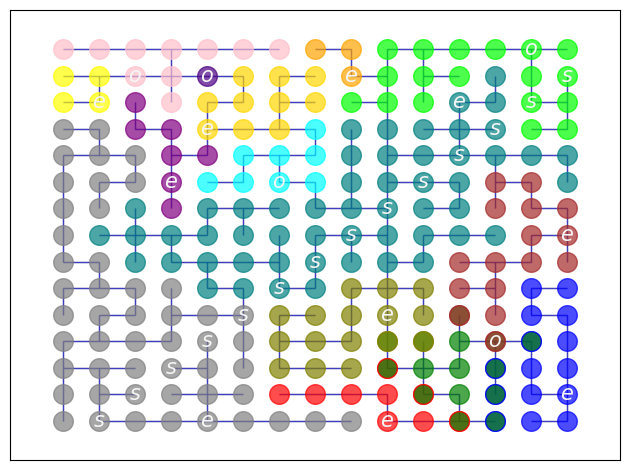

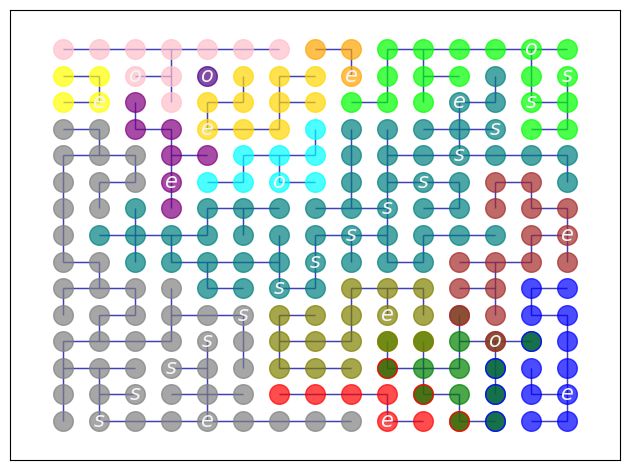

In [15]:
plot.plot_graph_clusters_boundaries(spanning_tree, V_stops, V_possible, V_existing, all_facilities, seeds, node_size, solution, boundaries, origin)
plot.plot_graph_clusters_boundaries(partitioned_tree, V_stops, V_possible, V_existing, all_facilities, seeds, node_size, solution, boundaries, origin)

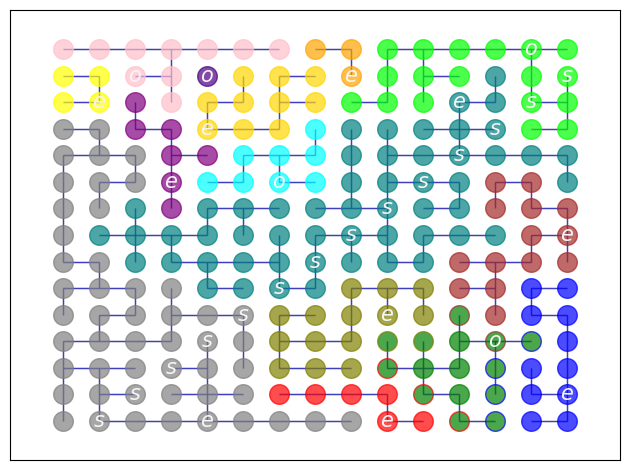

In [16]:
com = nx.connected_components(partitioned_tree)
sets = list(com)
clusterim = {}


for setim in sets:
    listim = list(setim)
    center = [value for value in seeds if value in listim]

    clusterim[center[0]] = listim

plot.plot_graph_clusters_boundaries(partitioned_tree, V_stops, V_possible, V_existing, all_facilities, seeds, node_size, clusterim, boundaries, origin)

In [17]:
alpha = 0.3
num_iterations = 10000

results, initial, solution, energy_pop, energy_access = search.multistart_descent_search(grid, G, travel2, seeds, alpha, num_iterations, clusterim)
initial_pop, initial_access = search.objective_function(grid, initial, travel2)

print("initial population: ", initial_pop)
print("initial access: ", initial_access)
print("pop energy: ", energy_pop)
print("access energy: ", energy_access)
plot.plot_graph_clusters(G, V_stops, V_possible, V_existing, all_facilities, seeds, node_size, initial)
plot.plot_graph_clusters(G, V_stops, V_possible, V_existing, all_facilities, seeds, node_size, clusterim)

iteration =  0
neighborhood=  ((1, 12), {((1, 12), (9, 0)): [], ((1, 12), (14, 1)): [], ((1, 12), (12, 3)): [], ((1, 12), (3, 9)): [(1, 12)], ((1, 12), (2, 13)): [(0, 13), (1, 13)], ((1, 12), (14, 7)): [], ((1, 12), (4, 11)): [], ((1, 12), (4, 13)): [], ((1, 12), (6, 9)): [], ((1, 12), (8, 13)): [], ((1, 12), (4, 0)): [(0, 12)], ((1, 12), (9, 4)): [], ((1, 12), (13, 14)): [], ((1, 12), (11, 12)): []}, {(1, 12): {(9, 0): [(9, 0), (7, 1), (8, 1), (6, 1), (10, 0), (9, 1)], (14, 1): [(13, 4), (14, 4), (13, 1), (14, 1), (13, 0), (14, 0), (14, 3), (13, 2), (14, 2), (13, 5), (14, 5)], (12, 3): [(11, 1), (12, 1), (9, 3), (11, 0), (12, 0), (11, 3), (10, 1), (9, 2), (12, 3), (13, 3), (11, 2), (12, 2), (10, 3), (11, 4), (10, 2)], (1, 12): [], (3, 9): [(4, 10), (3, 8), (3, 10), (3, 9), (2, 12), (2, 11), (3, 11), (1, 12)], (2, 13): [(2, 14), (3, 14), (5, 14), (6, 14), (1, 14), (2, 13), (3, 13), (4, 14), (3, 12), (0, 14), (1, 13)], (14, 7): [(13, 8), (12, 4), (14, 8), (13, 7), (14, 7), (12, 9), (14,

AttributeError: 'tuple' object has no attribute 'keys'

In [ ]:
#cluster = sampling.heu_cluster(G, grid, V_stops, V_blocks, all_facilities, centers1, travel2)
#plot.plot_graph_clusters_boundaries(G, V_stops, V_possible, V_existing, all_facilities, centers1, node_size, cluster, boundaries, origin)